In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report,recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

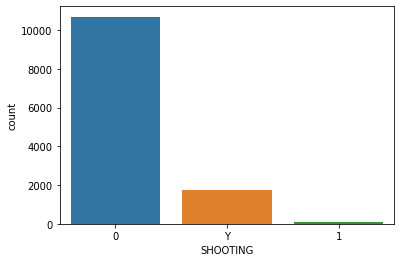

In [2]:
ab = pd.read_csv('/Users/ronakmehta/Documents/Crimes in Boston/analyseboston.csv',encoding='utf-8')
sns.countplot(data=ab, x = 'SHOOTING', label='Count')

In [3]:
ab.MONTH.unique()

array([10, 11,  9,  7,  8,  6,  3,  4,  1,  5,  2, 12])

In [4]:
ab['SHOOTING'] = ab['SHOOTING'].map({'Y':1,'1':1,'0':0})

In [5]:
ab['SHOOTING'].fillna(0, inplace=True)

In [6]:
ab.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     10781
OFFENSE_DESCRIPTION        0
DISTRICT                2229
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               10891
STREET                 13524
Lat                    37985
Long                   37985
Location                   0
dtype: int64

In [7]:
print("Unique Values of UCR_PART column",ab.UCR_PART.unique())

Unique Values of UCR_PART column [nan 'Part One' 'Part Three' 'Part Two' 'Other']


In [8]:
l=[]
for i in ab.OFFENSE_CODE.unique():
    l.append(i)
print(len(l))

233


In [9]:
g = []
for i in ab.OFFENSE_DESCRIPTION.unique():
    g.append(i)
print(len(g))

281


In [10]:
j=[]
for i in ab.OFFENSE_CODE_GROUP.unique():
    j.append(i)
print(len(j))

68


In [11]:
ab.loc[ab['OFFENSE_DESCRIPTION']=='SICK ASSIST']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0.0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
303901,192090751,3005,NaN,SICK ASSIST,C11,337,0.0,2019-11-08 21:07:00,2019,11,Friday,21,NaN,COLUMBIA RD,NaN,NaN,"(0.00000000, 0.00000000)"
305067,192090637,3005,NaN,SICK ASSIST,D14,779,0.0,2019-11-08 13:15:00,2019,11,Friday,13,NaN,MAPLETON ST,NaN,NaN,"(0.00000000, 0.00000000)"
306458,192090211,3005,NaN,SICK ASSIST,A1,80,0.0,2019-11-06 23:57:00,2019,11,Wednesday,23,NaN,SNOW HILL ST,NaN,NaN,"(0.00000000, 0.00000000)"
311525,192089650,3005,NaN,SICK ASSIST,A15,50,0.0,2019-11-05 09:19:00,2019,11,Tuesday,9,NaN,RUTHERFORD AVE,NaN,NaN,"(0.00000000, 0.00000000)"
314946,192089309,3005,NaN,SICK ASSIST,A1,75,0.0,2019-10-30 18:26:00,2019,10,Wednesday,18,NaN,MERRIMAC ST,NaN,NaN,"(0.00000000, 0.00000000)"
319512,192088766,3005,NaN,SICK ASSIST,D14,800,0.0,2019-11-02 01:24:00,2019,11,Saturday,1,NaN,BRIGHTON AVE,NaN,NaN,"(0.00000000, 0.00000000)"
323894,192087463,3005,NaN,SICK ASSIST,C11,344,0.0,2019-10-28 22:56:00,2019,10,Monday,22,NaN,CORONA ST,NaN,NaN,"(0.00000000, 0.00000000)"
324723,192087352,3005,NaN,SICK ASSIST,B2,330,0.0,2019-10-28 17:09:00,2019,10,Monday,17,NaN,BLUE HILL AVENUE,NaN,NaN,"(0.00000000, 0.00000000)"
324987,192087351,3005,NaN,SICK ASSIST,A1,111,0.0,2019-10-28 16:42:00,2019,10,Monday,16,NaN,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [12]:
r = []
for i in ab.OFFENSE_CODE.unique():
    r.append(i)
print(len(r))

233


In [13]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SICK ASSIST']
l['OFFENSE_CODE_GROUP'].isnull().sum()

456

In [14]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SICK ASSIST', 'OFFENSE_CODE_GROUP']='Sick Assist'

In [15]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VANDALISM']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

414


array([nan, 'Vandalism'], dtype=object)

In [16]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VANDALISM', 'OFFENSE_CODE_GROUP']='Vandalism'

In [17]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - AGGRAVATED']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

335


array([nan, 'Aggravated Assault'], dtype=object)

In [18]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - AGGRAVATED', 'OFFENSE_CODE_GROUP']='Aggravated Assault'

In [19]:
ab.loc[ab.OFFENSE_CODE_GROUP.isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
303342,192090758,3301,NaN,VERBAL DISPUTE,D4,619,0.0,2019-11-08 21:20:00,2019,11,Friday,21,NaN,MASSACHUSETTS AVE,NaN,NaN,"(0.00000000, 0.00000000)"
303602,192090753,3112,NaN,LANDLORD - TENANT,C11,377,0.0,2019-11-08 21:27:00,2019,11,Friday,21,NaN,BOUTWELL ST,NaN,NaN,"(0.00000000, 0.00000000)"
303825,192090752,3115,NaN,INVESTIGATE PERSON,C6,214,0.0,2019-11-08 21:39:00,2019,11,Friday,21,NaN,W BROADWAY,NaN,NaN,"(0.00000000, 0.00000000)"
304693,192090696,3301,NaN,VERBAL DISPUTE,B2,267,0.0,2019-11-08 17:45:00,2019,11,Friday,17,NaN,DUDLEY ST,NaN,NaN,"(0.00000000, 0.00000000)"
305029,192090638,613,NaN,LARCENY SHOPLIFTING,D4,,0.0,2019-11-08 15:24:00,2019,11,Friday,15,NaN,RING RD,NaN,NaN,"(0.00000000, 0.00000000)"
305625,192090636,2610,NaN,TRESPASSING,B3,465,0.0,2019-11-04 23:50:00,2019,11,Monday,23,NaN,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
305662,192090372,3115,NaN,INVESTIGATE PERSON,A1,,0.0,2019-11-07 02:39:00,2019,11,Thursday,2,NaN,CHATHAM ST,NaN,NaN,"(0.00000000, 0.00000000)"
306381,192090264,3801,NaN,M/V ACCIDENT - OTHER,A1,,0.0,2019-11-07 09:08:00,2019,11,Thursday,9,NaN,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
306606,192090210,801,NaN,ASSAULT - SIMPLE,D14,769,0.0,2019-11-06 23:45:00,2019,11,Wednesday,23,NaN,MARKET ST,NaN,NaN,"(0.00000000, 0.00000000)"
308711,192090209,3301,NaN,VERBAL DISPUTE,D4,623,0.0,2019-11-06 23:13:00,2019,11,Wednesday,23,NaN,COMMONWEALTH AVE,NaN,NaN,"(0.00000000, 0.00000000)"


In [20]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PERSON']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

837


array(['Investigate Person', 'INVESTIGATE PERSON', nan], dtype=object)

In [21]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PERSON', 'OFFENSE_CODE_GROUP']='Investigate Person'

In [22]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VERBAL DISPUTE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

887


array(['Verbal Disputes', nan], dtype=object)

In [23]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VERBAL DISPUTE', 'OFFENSE_CODE_GROUP']='Verbal Disputes'

In [24]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PROPERTY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

400


array(['Investigate Property', nan], dtype=object)

In [25]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PROPERTY', 'OFFENSE_CODE_GROUP']='Investigate Property'

In [26]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - SIMPLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

739


array(['Simple Assault', nan], dtype=object)

In [27]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - SIMPLE', 'OFFENSE_CODE_GROUP']='Simple Assault'

In [28]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'AUTO THEFT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

115


array(['Auto Theft', nan], dtype=object)

In [29]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'AUTO THEFT', 'OFFENSE_CODE_GROUP']='Auto Theft'

In [30]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'TRESPASSING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

91


array(['Other', nan], dtype=object)

In [31]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'TRESPASSING', 'OFFENSE_CODE_GROUP']='Other'

In [32]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY SHOPLIFTING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

277


array(['Larceny', nan], dtype=object)

In [33]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY SHOPLIFTING', 'OFFENSE_CODE_GROUP']='Larceny'

In [34]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

142


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [35]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [36]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER CITY VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

21


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [37]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER CITY VEHICLE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [38]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'TOWED MOTOR VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

354


array(['Towed', nan], dtype=object)

In [39]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'TOWED MOTOR VEHICLE','OFFENSE_CODE_GROUP']='Towed'

In [40]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LANDLORD - TENANT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

32


array([nan], dtype=object)

In [41]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LANDLORD - TENANT','OFFENSE_CODE_GROUP']='Landlord/Tenant Disputes'

In [42]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - POLICE VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

28


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [43]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - POLICE VEHICLE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [44]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - FOUND']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

101


array(['Property Found', nan], dtype=object)

In [45]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - FOUND','OFFENSE_CODE_GROUP']='Property Found'

In [46]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'MISSING PERSON']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

125


array(['Missing Person Reported', nan], dtype=object)

In [47]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'MISSING PERSON','OFFENSE_CODE_GROUP']='Missing Person Reported'

In [48]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'BURGLARY - RESIDENTIAL']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

153


array([nan], dtype=object)

In [49]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'BURGLARY - RESIDENTIAL','OFFENSE_CODE_GROUP']='Residential Burglary'

In [50]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LICENSE PREMISE VIOLATION']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

74


array(['License Violation', nan], dtype=object)

In [51]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LICENSE PREMISE VIOLATION','OFFENSE_CODE_GROUP']='License Violation'

In [52]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

268


array([nan], dtype=object)

In [53]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE','OFFENSE_CODE_GROUP']='Drug Violation'

In [54]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VAL - VIOLATION OF AUTO LAW']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

90


array([nan], dtype=object)

In [55]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VAL - VIOLATION OF AUTO LAW','OFFENSE_CODE_GROUP']='Other'

In [56]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SUDDEN DEATH']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array(['Medical Assistance', nan], dtype=object)

In [57]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SUDDEN DEATH','OFFENSE_CODE_GROUP']='Medical Assistance'

In [58]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY ALL OTHERS']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

203


array(['Larceny', nan], dtype=object)

In [59]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY ALL OTHERS','OFFENSE_CODE_GROUP']='Larceny'

In [60]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'FIRE REPORT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array([nan], dtype=object)

In [61]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'FIRE REPORT','OFFENSE_CODE_GROUP']='Fire Related Reports'

In [62]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - LOST/ MISSING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

284


array([nan], dtype=object)

In [63]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - LOST/ MISSING','OFFENSE_CODE_GROUP']='Property Lost'

In [64]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - PROPERTY DAMAGE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

231


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [65]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - PROPERTY DAMAGE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [66]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PROPERTY DAMAGE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

504


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [67]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PROPERTY DAMAGE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [68]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PERSONAL INJURY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [69]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PERSONAL INJURY','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [70]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT FROM BUILDING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

261


array(['Larceny', nan], dtype=object)

In [71]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT FROM BUILDING','OFFENSE_CODE_GROUP']='Larceny'

In [72]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ROBBERY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

143


array([nan], dtype=object)

In [73]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ROBBERY','OFFENSE_CODE_GROUP']='Robbery'

In [74]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'FRAUD - CREDIT CARD / ATM FRAUD']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

53


array(['Confidence Games', nan], dtype=object)

In [75]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'FRAUD - CREDIT CARD / ATM FRAUD','OFFENSE_CODE_GROUP']='Confidence Games'

In [76]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

127


array([nan], dtype=object)

In [77]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT','OFFENSE_CODE_GROUP']='Warrant Arrests'

In [78]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'THREATS TO DO BODILY HARM']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

265


array(['Other', nan], dtype=object)

In [79]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'THREATS TO DO BODILY HARM','OFFENSE_CODE_GROUP']='Other'

In [80]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SERVICE TO OTHER AGENCY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

43


array([nan], dtype=object)

In [81]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SERVICE TO OTHER AGENCY','OFFENSE_CODE_GROUP']='Police Service Incidents'

In [82]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

91


array([nan], dtype=object)

In [83]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [84]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT OF BICYCLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

69


array(['Larceny', nan], dtype=object)

In [85]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT OF BICYCLE','OFFENSE_CODE_GROUP']='Larceny'

In [86]:
#ab.loc[ab.OFFENSE_CODE == 423]
ab.loc[ab.OFFENSE_CODE==3125,'OFFENSE_CODE_GROUP']='Warrant Arrests'

In [87]:
ab.loc[ab.OFFENSE_CODE==1832,'OFFENSE_CODE_GROUP']='Drug Violation'

In [88]:
ab.loc[ab.OFFENSE_CODE==706,'OFFENSE_CODE_GROUP']='Auto Theft'

In [89]:
ab.loc[ab.OFFENSE_CODE==1107,'OFFENSE_CODE_GROUP']='Fraud'

In [90]:
ab.loc[ab.OFFENSE_CODE==2907,'OFFENSE_CODE_GROUP']='Violations'

In [91]:
ab.loc[ab.OFFENSE_CODE==3803,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [92]:
ab.loc[ab.OFFENSE_CODE==3502,'OFFENSE_CODE_GROUP']='Missing Person Located'

In [93]:
ab.loc[ab.OFFENSE_CODE==3205,'OFFENSE_CODE_GROUP']='License Plate Related Incidents'

In [94]:
ab.loc[ab.OFFENSE_CODE==3006,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [95]:
ab.loc[ab.OFFENSE_CODE==1001,'OFFENSE_CODE_GROUP']='Counterfeiting'

In [96]:
ab.loc[ab.OFFENSE_CODE==641,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [97]:
ab.loc[ab.OFFENSE_CODE==2657,'OFFENSE_CODE_GROUP']='Other'

In [98]:
ab.loc[ab.OFFENSE_CODE==2660,'OFFENSE_CODE_GROUP']='Other'

In [99]:
ab.loc[ab.OFFENSE_CODE==2005,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

In [100]:
ab.loc[ab.OFFENSE_CODE==2662,'OFFENSE_CODE_GROUP']='Ballistics'

In [101]:
ab.loc[ab.OFFENSE_CODE==614,'OFFENSE_CODE_GROUP']='Larceny From Motor Vehicle'

In [102]:
ab.loc[ab.OFFENSE_CODE==2101,'OFFENSE_CODE_GROUP']='Operating Under the Influence'

In [103]:
ab.loc[ab.OFFENSE_CODE==2670,'OFFENSE_CODE_GROUP']='Criminal Harassment'

In [104]:
ab.loc[ab.OFFENSE_CODE==531,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [105]:
ab.loc[ab.OFFENSE_CODE==736,'OFFENSE_CODE_GROUP']='Auto Theft Recovery'

In [106]:
ab.loc[ab.OFFENSE_CODE==3001,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [107]:
ab.loc[ab.OFFENSE_CODE==1102,'OFFENSE_CODE_GROUP']='Fraud'

In [108]:
ab.loc[ab.OFFENSE_CODE==3821,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [109]:
ab.loc[ab.OFFENSE_CODE==3402,'OFFENSE_CODE_GROUP']='Service'

In [110]:
ab.loc[ab.OFFENSE_CODE==3503,'OFFENSE_CODE_GROUP']='Missing Person Located'

In [111]:
ab.loc[ab.OFFENSE_CODE==615,'OFFENSE_CODE_GROUP']='Larceny From Motor Vehicle'

In [112]:
ab.loc[ab.OFFENSE_CODE==1304,'OFFENSE_CODE_GROUP']='Recovered Stolen Property'

In [113]:
ab.loc[ab.OFFENSE_CODE==3116,'OFFENSE_CODE_GROUP']='Harbor Related Incidents'

In [114]:
ab.loc[ab.OFFENSE_CODE==540,'OFFENSE_CODE_GROUP']='Commercial Burglary'

In [115]:
ab.loc[ab.OFFENSE_CODE==1300,'OFFENSE_CODE_GROUP']='Recovered Stolen Property'

In [116]:
ab.loc[ab.OFFENSE_CODE==3119,'OFFENSE_CODE_GROUP']='Firearm Discovery'

In [117]:
ab.loc[ab.OFFENSE_CODE==3018,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [118]:
ab.loc[ab.OFFENSE_CODE==3810,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [119]:
ab.loc[ab.OFFENSE_CODE==727,'OFFENSE_CODE_GROUP']='Auto Theft'

In [120]:
ab.loc[ab.OFFENSE_CODE==241,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [121]:
ab.loc[ab.OFFENSE_CODE==735,'OFFENSE_CODE_GROUP']='Auto Theft Recovery'

In [122]:
ab.loc[ab.OFFENSE_CODE==2622,'OFFENSE_CODE_GROUP']='Other'

In [123]:
ab.loc[ab.OFFENSE_CODE==2006,'OFFENSE_CODE_GROUP']='Restraining Order Violations'

In [124]:
ab.loc[ab.OFFENSE_CODE==2604,'OFFENSE_CODE_GROUP']='Other'

In [125]:
ab.loc[ab.OFFENSE_CODE==3625,'OFFENSE_CODE_GROUP']='Other'

In [126]:
ab.loc[ab.OFFENSE_CODE==804,'OFFENSE_CODE_GROUP']='Simple Assault'

In [127]:
ab.loc[ab.OFFENSE_CODE==3106,'OFFENSE_CODE_GROUP']='Property Related Damage'

In [128]:
ab.loc[ab.OFFENSE_CODE==2403,'OFFENSE_CODE_GROUP']='Disorderly Conduct'

In [129]:
ab.loc[ab.OFFENSE_CODE==3305,'OFFENSE_CODE_GROUP']='Assembly or Gathering Violations'

In [130]:
ab.loc[ab.OFFENSE_CODE==1825,'OFFENSE_CODE_GROUP']='Drug Violation'

In [131]:
ab.loc[ab.OFFENSE_CODE==1501,'OFFENSE_CODE_GROUP']='Firearm Violations'

In [132]:
ab.loc[ab.OFFENSE_CODE==3130,'OFFENSE_CODE_GROUP']='Search Warrants'

In [133]:
ab.loc[ab.OFFENSE_CODE==2007,'OFFENSE_CODE_GROUP']='Restraining Order Violations'

In [134]:
ab.loc[ab.OFFENSE_CODE==2646,'OFFENSE_CODE_GROUP']='Liquor Violation'

In [135]:
ab.loc[ab.OFFENSE_CODE==3811,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [136]:
ab.loc[ab.OFFENSE_CODE==244,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [137]:
ab.loc[ab.OFFENSE_CODE==2632,'OFFENSE_CODE_GROUP']='Evading Fare'

In [138]:
ab.loc[ab.OFFENSE_CODE==2914,'OFFENSE_CODE_GROUP']='Violations'

In [139]:
ab.loc[ab.OFFENSE_CODE==1109,'OFFENSE_CODE_GROUP']='Fraud'

In [140]:
ab.loc[ab.OFFENSE_CODE==2648,'OFFENSE_CODE_GROUP']='Bomb Hoax'

In [141]:
ab.loc[ab.OFFENSE_CODE==3170,'OFFENSE_CODE_GROUP']='Other'

In [142]:
ab.loc[ab.OFFENSE_CODE==612,'OFFENSE_CODE_GROUP']='Larceny'

In [143]:
ab.loc[ab.OFFENSE_CODE==3004,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [144]:
ab.loc[ab.OFFENSE_CODE==1415,'OFFENSE_CODE_GROUP']='Vandalism'

In [145]:
ab.loc[ab.OFFENSE_CODE==3008,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [146]:
ab.loc[ab.OFFENSE_CODE==1201,'OFFENSE_CODE_GROUP']='Embezzlement'

In [147]:
ab.loc[ab.OFFENSE_CODE==261,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [148]:
ab.loc[ab.OFFENSE_CODE==611,'OFFENSE_CODE_GROUP']='Larceny'

In [149]:
ab.loc[ab.OFFENSE_CODE==900,'OFFENSE_CODE_GROUP']='Arson'

In [150]:
ab.loc[ab.OFFENSE_CODE==2401,'OFFENSE_CODE_GROUP']='Disorderly Conduct'

In [151]:
ab.loc[ab.OFFENSE_CODE==1722,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [152]:
ab.loc[ab.OFFENSE_CODE==3202,'OFFENSE_CODE_GROUP']='Property Found'

In [153]:
ab.loc[ab.OFFENSE_CODE==1108,'OFFENSE_CODE_GROUP']='Fraud'

In [154]:
ab.loc[ab.OFFENSE_CODE==2612,'OFFENSE_CODE_GROUP']='Fire Related Reports'

In [155]:
ab.loc[ab.OFFENSE_CODE==1602,'OFFENSE_CODE_GROUP']='Prostitution'

In [156]:
ab.loc[ab.OFFENSE_CODE==1603,'OFFENSE_CODE_GROUP']='Prostitution'

In [157]:
ab.loc[ab.OFFENSE_CODE==1601,'OFFENSE_CODE_GROUP']='Prostitution'

In [158]:
ab.loc[ab.OFFENSE_CODE==2613,'OFFENSE_CODE_GROUP']='Other'

In [159]:
ab.loc[ab.OFFENSE_CODE==2619,'OFFENSE_CODE_GROUP']='Prisoner Related Incidents'

In [160]:
ab.loc[ab.OFFENSE_CODE==3304,'OFFENSE_CODE_GROUP']='Assembly or Gathering Violations'

In [161]:
ab.loc[ab.OFFENSE_CODE==243,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [162]:
ab.loc[ab.OFFENSE_CODE==3122,'OFFENSE_CODE_GROUP']='Aircraft'

In [163]:
ab.loc[ab.OFFENSE_CODE==2623,'OFFENSE_CODE_GROUP']='Other'

In [164]:
ab.loc[ab.OFFENSE_CODE==111,'OFFENSE_CODE_GROUP']='Homicide'

In [165]:
ab.loc[ab.OFFENSE_CODE==2102,'OFFENSE_CODE_GROUP']='Operating Under the Influence'

In [166]:
ab.loc[ab.OFFENSE_CODE==2608,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

In [167]:
ab.loc[ab.OFFENSE_CODE==3403,'OFFENSE_CODE_GROUP']='Police Service Incidents'

In [168]:
ab.loc[ab.OFFENSE_CODE==2616,'OFFENSE_CODE_GROUP']='Other'

In [169]:
ab.loc[ab.OFFENSE_CODE==3203,'OFFENSE_CODE_GROUP']='Firearm Discovery'

In [170]:
ab.loc[ab.OFFENSE_CODE==2671,'OFFENSE_CODE_GROUP']='Other'

In [171]:
ab.loc[ab.OFFENSE_CODE==618,'OFFENSE_CODE_GROUP']='Larceny'

In [172]:
ab.loc[ab.OFFENSE_CODE==2003,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

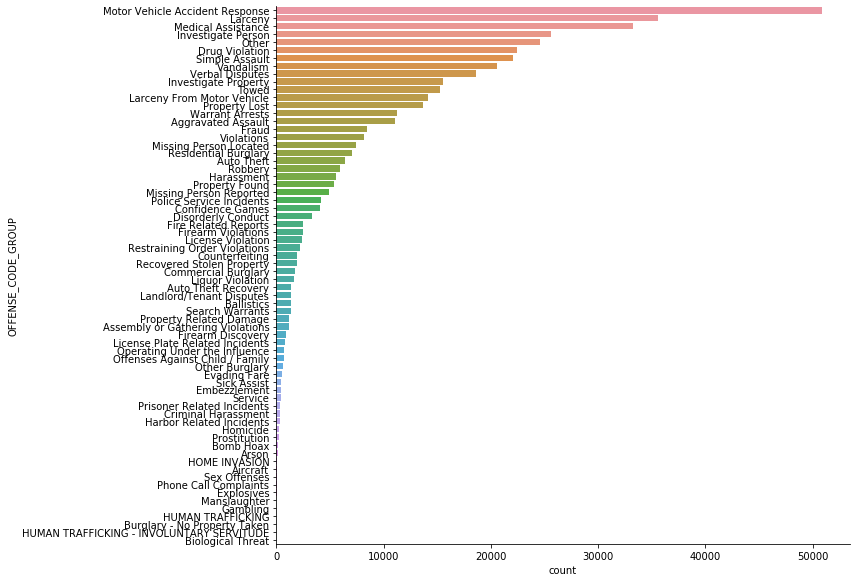

In [173]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=ab.OFFENSE_CODE_GROUP.value_counts().index,
           data=ab)

In [174]:
ab.loc[ab.REPORTING_AREA==" "]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,Aggravated Assault,ASSAULT - AGGRAVATED,External,,0.0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
9,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,0.0,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"
88,I192078548,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,C6,,0.0,2019-09-28 20:52:00,2019,9,Saturday,20,Part Three,DORCHESTER ST,NaN,NaN,"(0.00000000, 0.00000000)"
91,I192078545,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,NaN,,0.0,2019-09-28 20:55:00,2019,9,Saturday,20,Part One,BREMEN,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
92,I192078544,3109,Police Service Incidents,SERVICE TO OTHER PD INSIDE OF MA.,B2,,0.0,2019-09-28 20:31:00,2019,9,Saturday,20,Part Three,ELM HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
114,I192078524,3410,Towed,TOWED MOTOR VEHICLE,A1,,0.0,2019-09-28 18:17:00,2019,9,Saturday,18,Part Three,CHARTER ST,NaN,NaN,"(0.00000000, 0.00000000)"
158,I192078475,3201,Property Lost,PROPERTY - LOST,A1,,0.0,2019-09-28 12:47:00,2019,9,Saturday,12,Part Three,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
170,I192078459,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,,0.0,2019-09-28 14:48:25,2019,9,Saturday,14,Part Two,NaN,42.331194,-71.077002,"(42.33119415, -71.07700218)"
215,I192078400,2906,Violations,VAL - OPERATING UNREG/UNINS CAR,B2,,0.0,2019-09-28 12:20:00,2019,9,Saturday,12,Part Two,HUMBOLDT AVE,NaN,NaN,"(0.00000000, 0.00000000)"
234,I192078380,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B2,,0.0,2019-09-28 10:31:00,2019,9,Saturday,10,Part Three,DUDLEY ST,NaN,NaN,"(0.00000000, 0.00000000)"


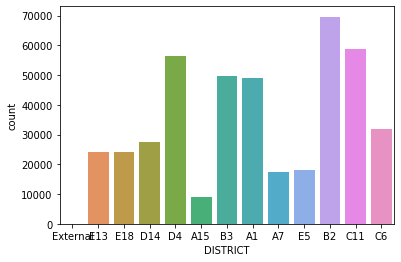

In [175]:
sns.countplot(data=ab, x = 'DISTRICT', label='Count')

In [176]:
g = []
for i in ab.OFFENSE_CODE_GROUP.unique():
    g.append(i)
print(len(g))

68


In [177]:
ab.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                2229
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               10891
STREET                 13524
Lat                    37985
Long                   37985
Location                   0
dtype: int64

In [178]:
##Changes from here
ab = ab.dropna()

In [179]:
ab.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [180]:
ab=ab.drop(['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','Location','STREET','Lat','Long'],axis=1)

In [181]:
set(ab['REPORTING_AREA'])

{' ',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '

In [182]:
ab['REPORTING_AREA']=ab['REPORTING_AREA'].replace(' ','0')

In [183]:
le = preprocessing.LabelEncoder()

In [184]:
x=ab
len(set((x.OFFENSE_CODE_GROUP)))

63

In [185]:
for i in x:
    x[i]=le.fit_transform(x[i])

In [186]:
X=x.drop('OFFENSE_CODE_GROUP', axis=1)
Y=x.OFFENSE_CODE_GROUP

In [187]:
model=tree.DecisionTreeClassifier(criterion="entropy")
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.4, random_state=0)

In [188]:
model.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [189]:
model2 = model.predict(xTest)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.23      0.25      0.24      4000
           1       0.30      0.44      0.36        16
           2       0.10      0.11      0.10        47
           3       0.26      0.29      0.28       380
           4       0.12      0.13      0.12      2264
           5       0.86      0.83      0.84       550
           6       0.04      0.05      0.04       505
           7       0.00      0.00      0.00         0
           8       0.02      0.02      0.02        42
           9       0.50      0.33      0.40         3
          10       0.10      0.11      0.10       680
          11       0.07      0.07      0.07      1563
          12       0.05      0.05      0.05       740
          13       0.00      0.00      0.00        61
          14       0.08      0.12      0.09      1184
          15       0.46      0.53      0.49      7684
          16       0.01      0.01      0.01       164
          17       0.02    

In [190]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [191]:
neigh2 = neigh.predict(xTest)
print(classification_report(yTest, neigh2))
print('The accuracy :- ',accuracy_score(yTest, neigh2)*100)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.45      0.90      0.60      4000
           1       0.39      0.88      0.54        16
           2       0.57      0.70      0.63        47
           3       0.39      0.93      0.55       380
           4       0.42      0.79      0.55      2264
           5       0.73      0.44      0.55       550
           6       0.38      0.88      0.53       505
           7       0.00      0.00      0.00         0
           8       0.39      0.93      0.55        42
           9       0.75      1.00      0.86         3
          10       0.43      0.70      0.53       680
          11       0.40      0.89      0.55      1563
          12       0.40      0.84      0.54       740
          13       0.33      0.80      0.47        61
          14       0.35      0.80      0.48      1184
          15       0.51      0.91      0.66      7684
          16       0.40      0.71      0.51       164
          17       0.42    

In [192]:
model=tree.DecisionTreeClassifier(criterion="gini")
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.4, random_state=0)
model.fit(xTrain,yTrain)

model2 = model.predict(xTest)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

              precision    recall  f1-score   support

           0       0.23      0.24      0.24      4000
           1       0.26      0.31      0.29        16
           2       0.13      0.15      0.14        47
           3       0.24      0.30      0.26       380
           4       0.12      0.13      0.12      2264
           5       0.86      0.78      0.82       550
           6       0.03      0.04      0.04       505
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        42
           9       0.50      0.33      0.40         3
          10       0.10      0.10      0.10       680
          11       0.06      0.07      0.07      1563
          12       0.04      0.05      0.05       740
          13       0.00      0.00      0.00        61
          14       0.08      0.12      0.09      1184
          15       0.46      0.53      0.49      7684
          16       0.01      0.01      0.01       164
          17       0.01    

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [193]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.25      0.24      0.25      4000
           1       0.26      0.31      0.29        16
           2       0.14      0.02      0.04        47
           3       0.31      0.34      0.32       380
           4       0.12      0.09      0.11      2264
           5       0.86      0.98      0.91       550
           6       0.05      0.04      0.04       505
           7       0.00      0.00      0.00         0
           8       0.03      0.02      0.03        42
           9       1.00      0.33      0.50         3
          10       0.16      0.09      0.11       680
          11       0.08      0.07      0.08      1563
          12       0.05      0.04      0.04       740
          13       0.00      0.00      0.00        61
          14       0.09      0.08      0.09      1184
          15       0.42      0.56      0.48      7684
          16       0.02      0.01      0.02       164
          17       0.01    

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [195]:
rf_classifier = BernoulliNB()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

The accuracy :-  11.489316077600344


In [196]:
rf_classifier = ExtraTreeClassifier()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

The accuracy :-  21.199450036580135


In [197]:
rf_classifier = KNeighborsClassifier()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

The accuracy :-  15.30689472489215


In [198]:
rf_classifier = GaussianNB()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

The accuracy :-  20.937712858548398


In [199]:
rf_classifier = LinearDiscriminantAnalysis()
rf_classifier.fit(xTrain,yTrain)

model2 = rf_classifier.predict(xTest)
#print(classification_report(yTest, model2))
print('The accuracy :- ',accuracy_score(yTest, model2)*100)

The accuracy :-  25.029011831781833
